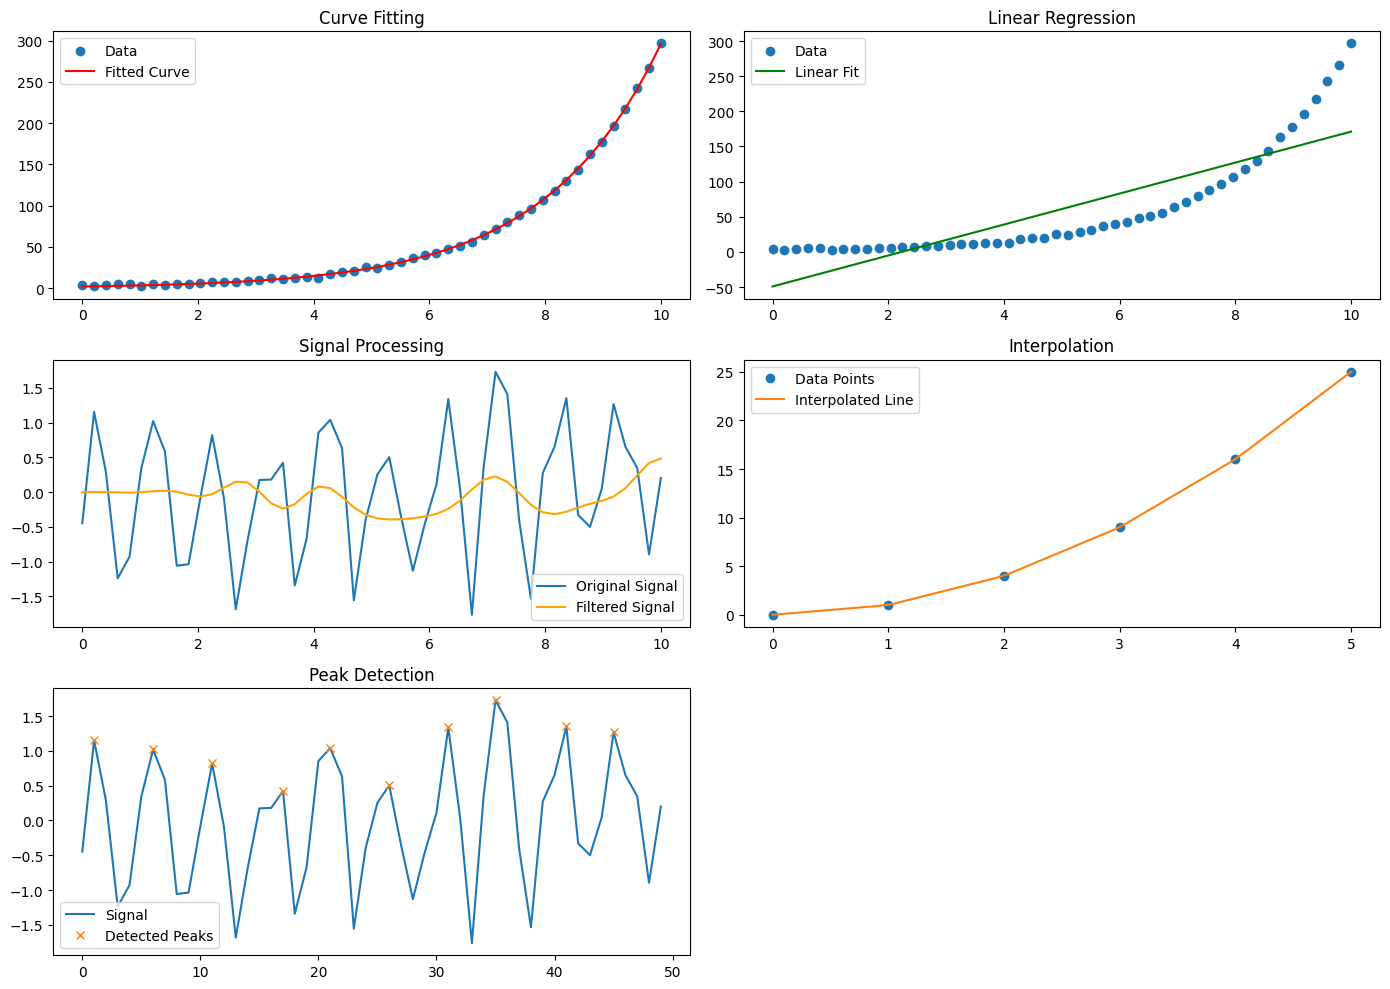

Curve Fitting Parameters: [2.01908614 0.49875358]
Linear Regression: slope=22.038368364689003, intercept=-49.22692916973436, r_value=0.8526478009834921, p_value=3.914448824116141e-15, std_err=1.9492335878509113
Optimization Result:   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3
Two-sample t-test: t_stat=-2.5388029513374453, p_value=0.011892149237382148
Numerical Integration Result: 2.0, Error Estimate: 2.220446049250313e-14
Gamma(5): 24.0
LU Decomposition Solution: [0.  0.5]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.stats import linregress, ttest_ind
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.signal import firwin, lfilter, find_peaks
from scipy.special import gamma
from scipy.linalg import lu_factor, lu_solve

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * np.exp(0.5 * x_data) + np.random.normal(size=x_data.size)

# 1. Curve Fitting
def model_func(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(model_func, x_data, y_data)

# 2. Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# 3. Optimization
def objective_function(x):
    return (x - 3) ** 2

result = minimize(objective_function, x0=0)

# 4. Signal Processing
# Create a synthetic signal
signal = np.sin(2 * np.pi * 1 * x_data) + 0.5 * np.random.normal(size=x_data.size)
numtaps = 29
cutoff = 0.3
fir_coeff = firwin(numtaps, cutoff)
filtered_signal = lfilter(fir_coeff, 1.0, signal)

# 5. Statistics
sample1 = np.random.normal(0, 1, 100)
sample2 = np.random.normal(0.5, 1, 100)
t_stat, p_value_ttest = ttest_ind(sample1, sample2)

# 6. Integration
def integrand(x):
    return np.sin(x)

integral_result, error = quad(integrand, 0, np.pi)

# 7. Interpolation
x_interp = np.array([0, 1, 2, 3, 4, 5])
y_interp = np.array([0, 1, 4, 9, 16, 25])
f_interp = interp1d(x_interp, y_interp, kind='linear')
x_new = np.linspace(0, 5, 50)
y_new = f_interp(x_new)

# 8. Special Functions
gamma_value = gamma(5)

# 9. Linear Algebra
A = np.array([[1, 2], [3, 4]])
b = np.array([1, 2])
lu, piv = lu_factor(A)
x_solution = lu_solve((lu, piv), b)

# 10. Peak Detection
peaks, _ = find_peaks(signal)

# Plotting the results
plt.figure(figsize=(14, 10))

# 1. Curve Fitting
plt.subplot(3, 2, 1)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, model_func(x_data, *popt), color='red', label='Fitted Curve')
plt.title('Curve Fitting')
plt.legend()

# 2. Linear Regression
plt.subplot(3, 2, 2)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, slope * x_data + intercept, color='green', label='Linear Fit')
plt.title('Linear Regression')
plt.legend()

# 4. Signal Processing
plt.subplot(3, 2, 3)
plt.plot(x_data, signal, label='Original Signal')
plt.plot(x_data, filtered_signal, color='orange', label='Filtered Signal')
plt.title('Signal Processing')
plt.legend()

# 7. Interpolation
plt.subplot(3, 2, 4)
plt.plot(x_interp, y_interp, 'o', label='Data Points')
plt.plot(x_new, y_new, label='Interpolated Line')
plt.title('Interpolation')
plt.legend()

# 10. Peak Detection
plt.subplot(3, 2, 5)
plt.plot(signal, label='Signal')
plt.plot(peaks, signal[peaks], "x", label='Detected Peaks')
plt.title('Peak Detection')
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"Curve Fitting Parameters: {popt}")
print(f"Linear Regression: slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}")
print(f"Optimization Result: {result}")
print(f"Two-sample t-test: t_stat={t_stat}, p_value={p_value_ttest}")
print(f"Numerical Integration Result: {integral_result}, Error Estimate: {error}")
print(f"Gamma(5): {gamma_value}")
print(f"LU Decomposition Solution: {x_solution}")
